In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Loading the data

In [ ]:
path='iris_flowers.csv'

data=pd.read_csv(path);
data['class']=data['class'].str.replace('iris_','')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#checking for null values and none found
missing_values_count = data.isnull().sum().sort_values(ascending=False)
missing_values_count

class           0
 petal_width    0
petal_length    0
sepal_width     0
sepal_length    0
dtype: int64

In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Exploratory data analysis

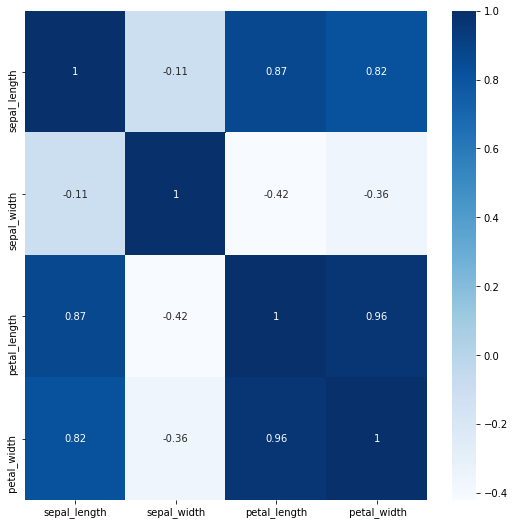

In [ ]:
cor=data.corr()
plt.figure(figsize=(9,9))
sns.heatmap(cor,annot=True,cmap='Blues')
#picking features having high correlation

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'scatterplot based on petal length and class')

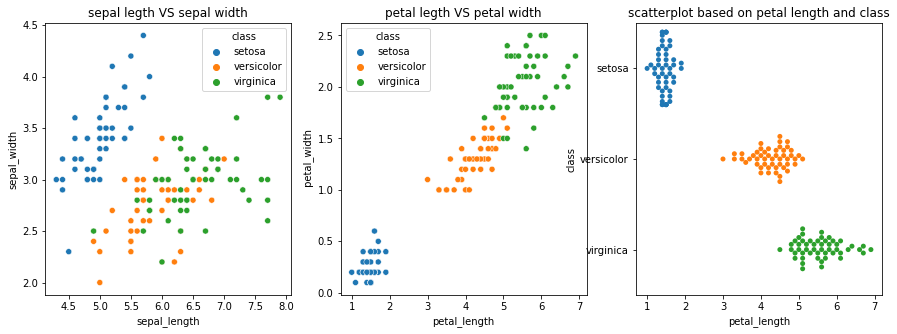

In [ ]:
fig, axs = plt.subplots(1, 3,figsize=(15,5))

sns.scatterplot(ax=axs[0],x=data.sepal_length,y=data.sepal_width,hue=data['class'])
axs[0].set_title('sepal legth VS sepal width')
sns.scatterplot(ax=axs[1],x=data.petal_length,y=data[' petal_width'],hue=data['class'])
axs[1].set_title('petal legth VS petal width')
sns.swarmplot(ax=axs[2],x=data.petal_length,y=data['class'])
axs[2].set_title('scatterplot based on petal length and class')

From the plot above we can see that we can fairly predict iris setosa flowers with petal length alone

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

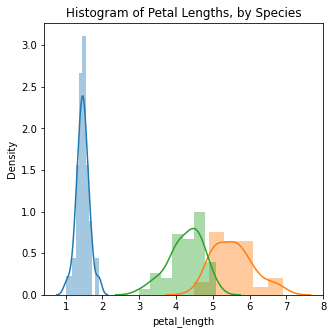

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Histogram of Petal Lengths, by Species')
sns.distplot(a=data.loc[data['class']=='setosa'].petal_length,label='setosa',kde=True)
sns.distplot(a=data.loc[data['class']=='virginica'].petal_length,label='virginica',kde=True)
sns.distplot(a=data.loc[data['class']=='versicolor'].petal_length,label='versicolor',kde=True)

# Creating our model

In [ ]:
#here we split our data into training and testing data
x=data.drop(columns=['class','sepal_width'])
y=data['class']
#y.head()
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.4,random_state = 5)

In [ ]:
# we create the model ,fit our data and do predictions using our testing data
from sklearn.linear_model import LogisticRegression

model=LogisticRegression();
model.fit(x_train,y_train)
y_preds=model.predict(x_test)
score = model.score(x_test, y_test)
score

0.9833333333333333

our model gives a 98% testing accuracy

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_preds,y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.95      1.00      0.98        20
   virginica       1.00      0.95      0.97        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [ ]:
y_preds

array(['versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica'],
      dtype=object)

In [ ]:
y_test

82     versicolor
134     virginica
114     virginica
42         setosa
109     virginica
57     versicolor
1          setosa
70     versicolor
25         setosa
84     versicolor
66     versicolor
133     virginica
102     virginica
107     virginica
26         setosa
23         setosa
123     virginica
130     virginica
21         setosa
12         setosa
71     versicolor
128     virginica
48         setosa
72     versicolor
88     versicolor
148     virginica
74     versicolor
96     versicolor
63     versicolor
132     virginica
39         setosa
53     versicolor
79     versicolor
10         setosa
50     versicolor
49         setosa
43         setosa
135     virginica
40         setosa
115     virginica
142     virginica
69     versicolor
17         setosa
46         setosa
54     versicolor
126     virginica
61     versicolor
124     virginica
117     virginica
20         setosa
146     virginica
35         setosa
6          setosa
15         setosa
28         setosa
97     ver